In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./data/airline_dataset/train.csv')

In [2]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [3]:
data = data.drop('id', axis=1)
pd.set_option('display.max_columns', None)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


## 결측치 확인

In [4]:
def check_missing_col(dataframe):
  missing_col = []
  for col in dataframe.columns:
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      print(f'결측치가 있는 컬럼은 : {col}입니다')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
  if missing_col == []:
    print('결측치가 없습니다')
  return missing_col

missing_col = check_missing_col(data)

결측치가 없습니다


### 기초 통계 분석

In [5]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


### 데이터 타입 확인

In [6]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

### 전체 feature 분포 시각화

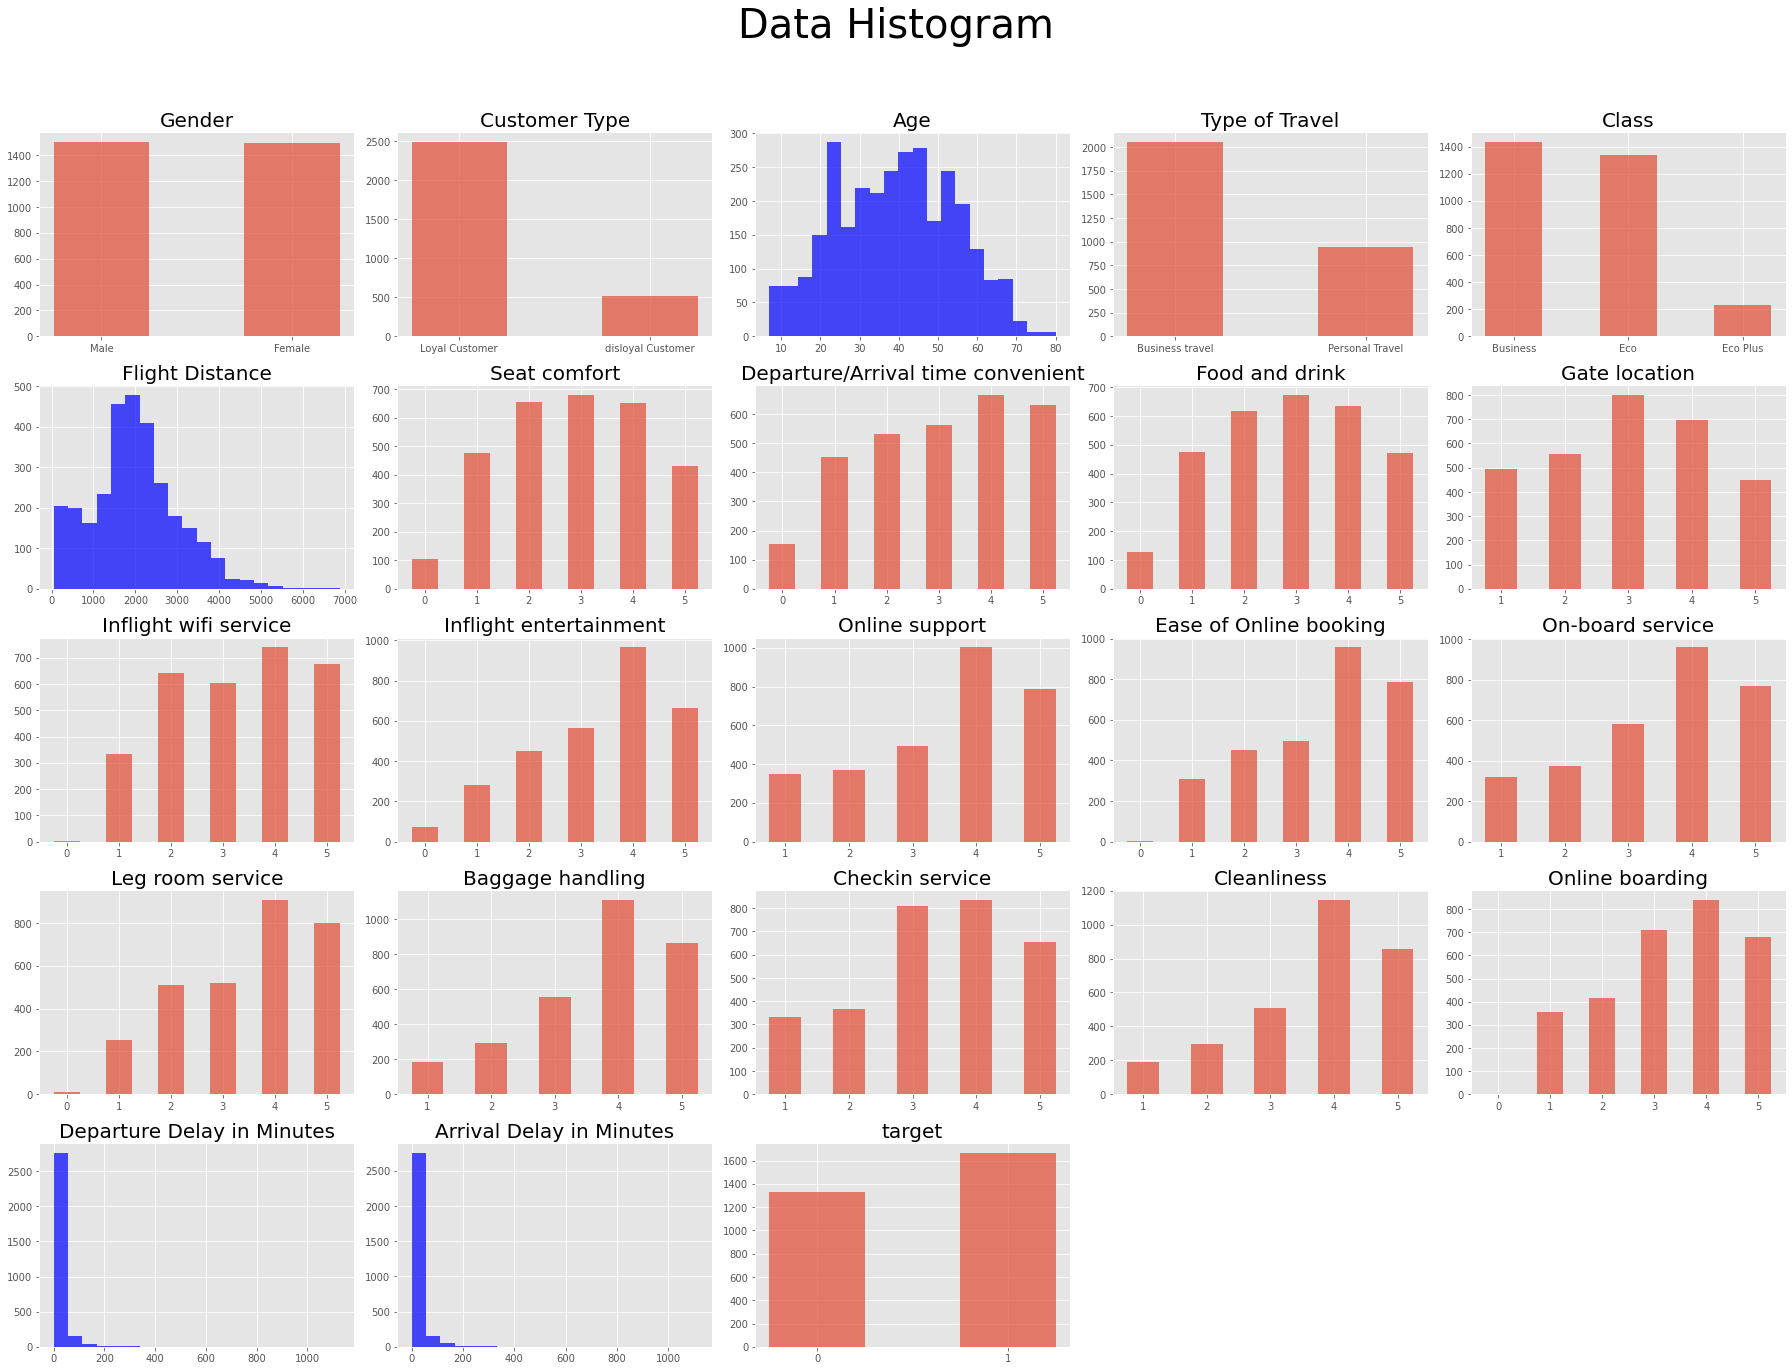

In [7]:
plt.style.use("ggplot")

# Using Histogram
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화
cols = data.columns
for i in range(len(cols)):
  plt.subplot(5, 5, i+1)
  plt.title(cols[i], fontsize=20)
  if len(data[cols[i]].unique()) > 20:
    plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
  else:
    temp = data[cols[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
    plt.xticks(temp.keys())

# 여백 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### target과 feature의 관계 (범주형 관계만 보기)

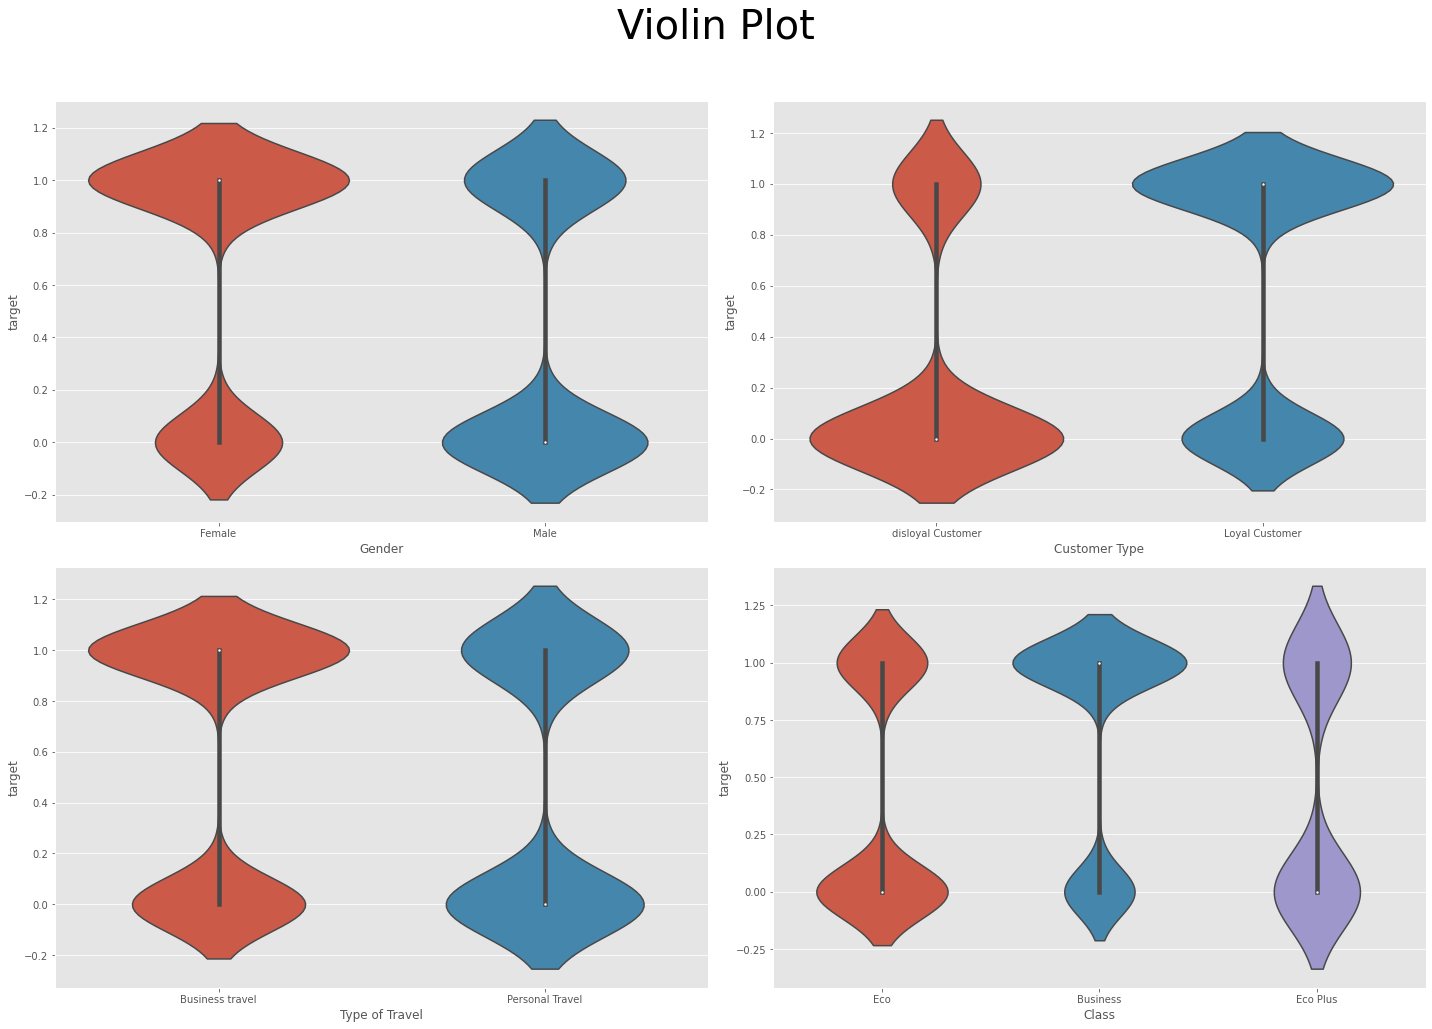

In [8]:
import seaborn as sns
target = "target"
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20, 15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(categorical_feature)):
  plt.subplot(2, 2, i+1)
  plt.xlabel(categorical_feature[i])
  plt.ylabel(target)
  sns.violinplot(x = data[categorical_feature[i]], y = data[target])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

위를 통해 알 수 있는 점은 Customer Type에서 disloyal인지 Loyal인지에 따라 만족도(target)이 상당히 차이가 난다.

### 수치형 데이터의 분포 확인

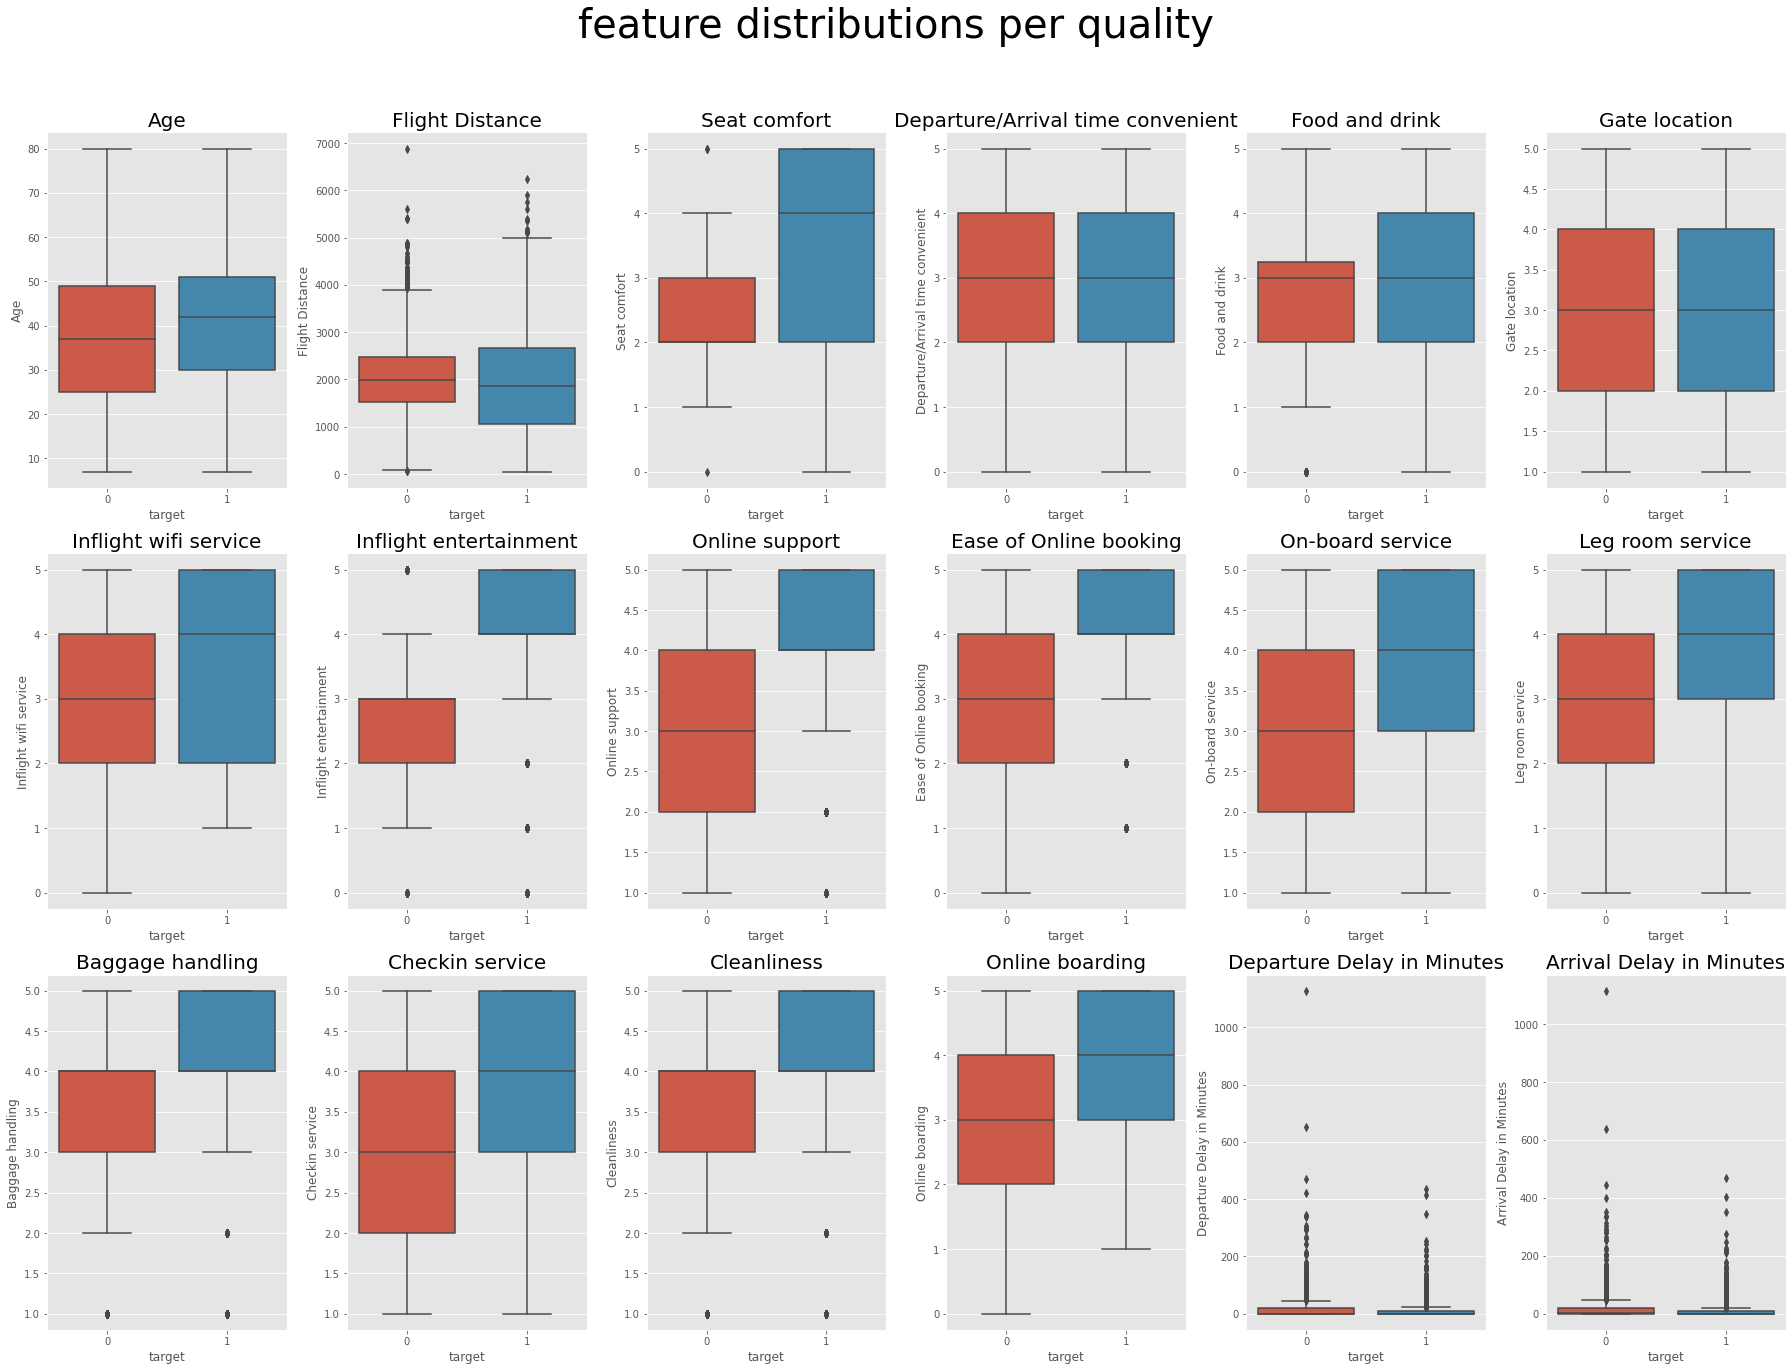

In [9]:
numeric_feature =data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스 플롯 사용
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize=40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
  sns.boxplot(x='target', y=col, ax=ax, data=num_data)
  ax.set_title(col, fontsize=20)
  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

출발, 도착 지연시간과 비행시간에 대해서 이상치가 많다. 인덱스를 추출함으로써 성능을 높이자

In [10]:
# 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes==object]] = corr_df[corr_df.columns[corr_df.dtypes==object]]

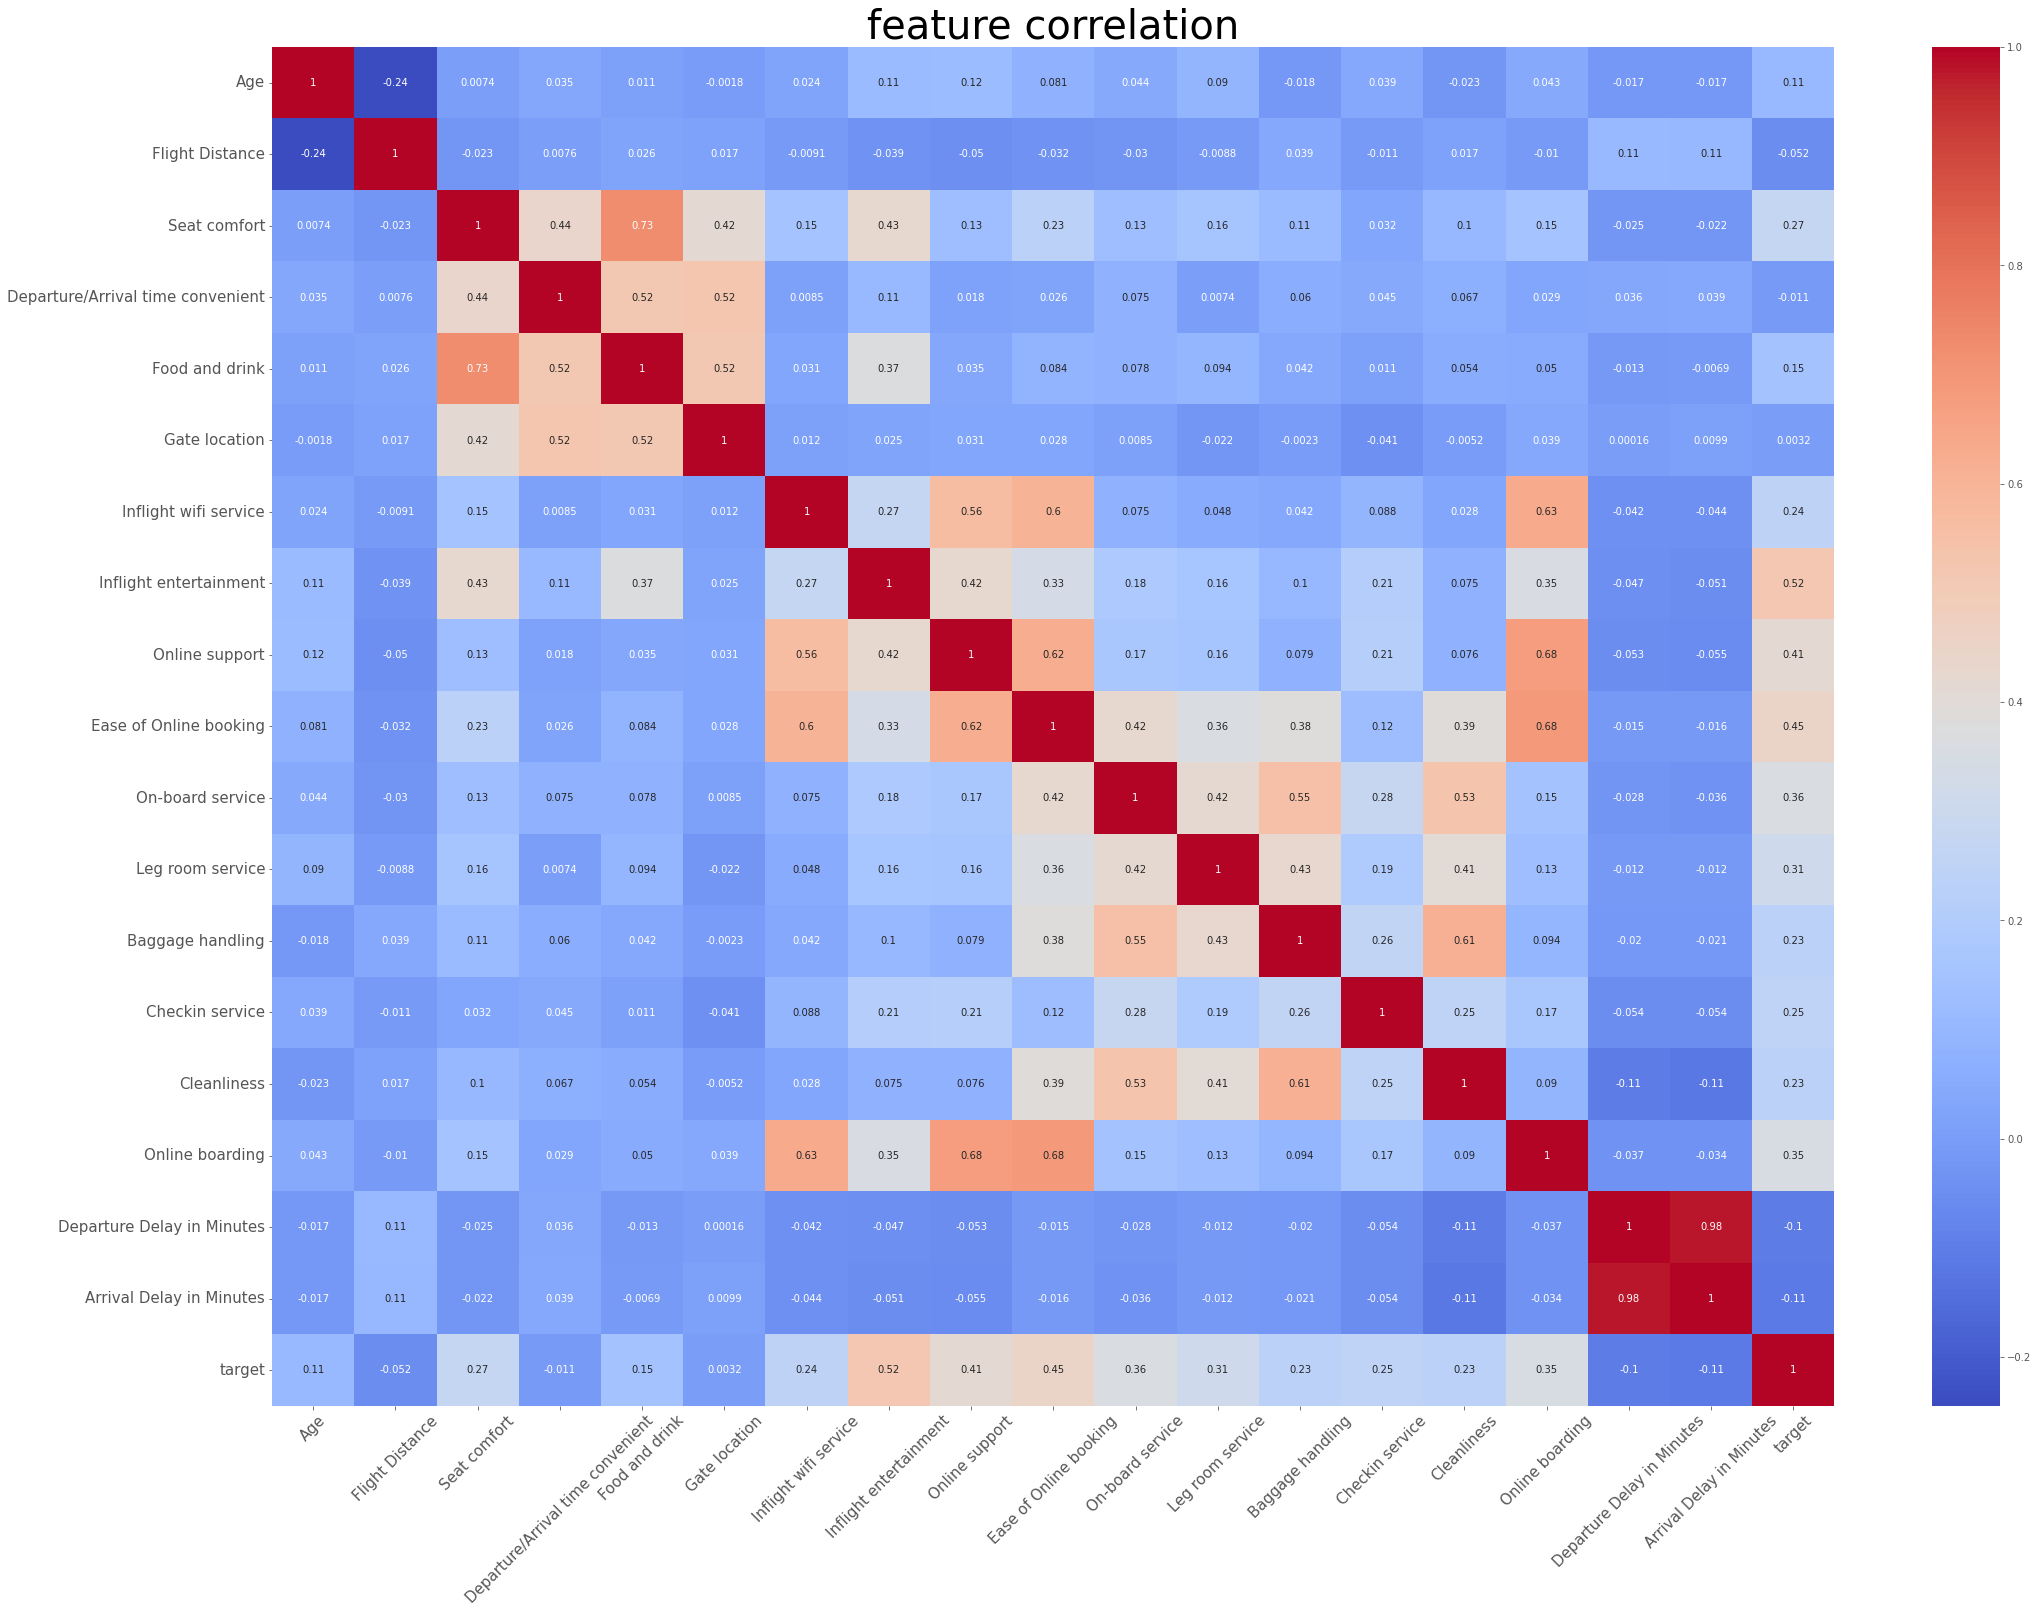

In [15]:
# 상관관계 분석도
plt.figure(figsize=(35, 25))
heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('feature correlation', fontsize=40)
plt.show()


고객 만족도인 target은 inflight entertainment와 가장 높은 상관을 보인다.

Departure Delau in Minutes와 Arrival Delay in Minutes는 상관관계수가 0.98로 매우높다. 

이와 연관된 키워드는 **다중공산성** 이라고한다. 독립변수 즉, target이 아닌 특징들에 대하여 서로 독립적인 관계여야한다고 한다.

이 관계성은 0.7이상의 상관계수를 띌 때 나타난다고 한다.
하나 더 본다면  Food and Drink와 Seat conforte이다. 이는 좌석 편리성과 음식 관계가 비례하다는 것으로 추측할 수 있다.

이 다중 공선성 처리 방법 중에 가장 간단한 방법은 둘 중 한 특징을 제거하는 것이라고 한다. 2개의 쌍중 target과의 상관계수가 낮은 특징을 제거하는 방법이 존재했다.

1. Depature Delay in Minutes & Arrival Delay in Minutes (target : 0.1 / 0.11)  
-> Depature Delay in Minutes 제거  
2. Food and drink & Seat confort (target : 0.15 / 0.27)  
-> Food and drink 제거  

## Using Tensorflow

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
tr_d = pd.read_csv('./data/airline_dataset/train.csv')
te_d = pd.read_csv('./data/airline_dataset/test.csv')
sample = pd.read_csv('./data/airline_dataset/sample_submission.csv')

tr_d = tr_d.drop(columns=['id'], axis = 1)
te_d = te_d.drop(columns=['id'], axis = 1)


### 전처리 과정

**공선성 처리**

In [3]:
tr_d.drop('Departure Delay in Minutes', axis = 1, inplace=True)
tr_d.drop('Food and drink', axis = 1, inplace = True)
te_d.drop('Departure Delay in Minutes', axis = 1, inplace=True)
te_d.drop('Food and drink', axis = 1, inplace = True)

In [4]:
tr_d.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,4,...,4,4,5,4,4,4,5,4,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,1,...,3,5,5,4,2,1,5,2,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,4,...,5,4,4,4,4,5,4,3,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,3,2,4,5,3,4,3,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,4,...,5,4,4,4,4,4,4,5,0.0,1


**이상치 처리** (출발, 도착 지연시간과 비행시간)

In [5]:
def outlier_iqr(data):
  # 백분위 수를 사용하여 매개 변수 지정 -> 넘파이 값을 퍼센트로 표시해주는 함수
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  
  return np.where((data > upper_bound) | (data < lower_bound))
  

In [6]:
Arrival_delay_index_data = outlier_iqr(tr_d['Arrival Delay in Minutes'])[0]
Flight_distance_index_data = outlier_iqr(tr_d['Flight Distance'])[0]
Garage_area_index_data = outlier_iqr(tr_d['Checkin service'])[0]

In [7]:
Arrival_delay_index_data

array([   6,   23,   30,   35,   36,   51,   57,   59,   62,   66,   78,
         82,   85,   92,  116,  134,  137,  151,  160,  162,  175,  180,
        198,  202,  206,  214,  245,  255,  258,  279,  283,  285,  290,
        292,  303,  309,  315,  325,  335,  340,  341,  349,  359,  368,
        373,  375,  377,  385,  391,  394,  416,  428,  429,  435,  454,
        457,  472,  483,  484,  490,  510,  511,  517,  522,  537,  539,
        573,  575,  587,  592,  599,  604,  620,  621,  623,  627,  638,
        641,  650,  652,  653,  670,  672,  676,  693,  695,  696,  703,
        707,  715,  721,  723,  737,  752,  763,  766,  773,  774,  783,
        792,  797,  798,  799,  809,  810,  824,  837,  846,  852,  858,
        862,  869,  883,  884,  895,  904,  906,  912,  923,  937,  947,
        948,  949,  962,  968,  978,  983,  987,  993, 1001, 1002, 1013,
       1014, 1020, 1027, 1031, 1034, 1044, 1065, 1068, 1069, 1073, 1074,
       1098, 1103, 1116, 1122, 1140, 1151, 1152, 11

이상치에 포함된 행이 너무 많아 학습이 지장이 가므로 제거가 아닌 평균값으로 대체

In [8]:
tr_d.loc[Arrival_delay_index_data, 'Arrival Delay in Minutes'] = tr_d['Arrival Delay in Minutes'].mean()
tr_d.loc[Flight_distance_index_data, 'Flight Distance'] = tr_d['Flight Distance'].mean()
tr_d.loc[Garage_area_index_data, 'Checkin service'] = tr_d['Checkin service'].mean()

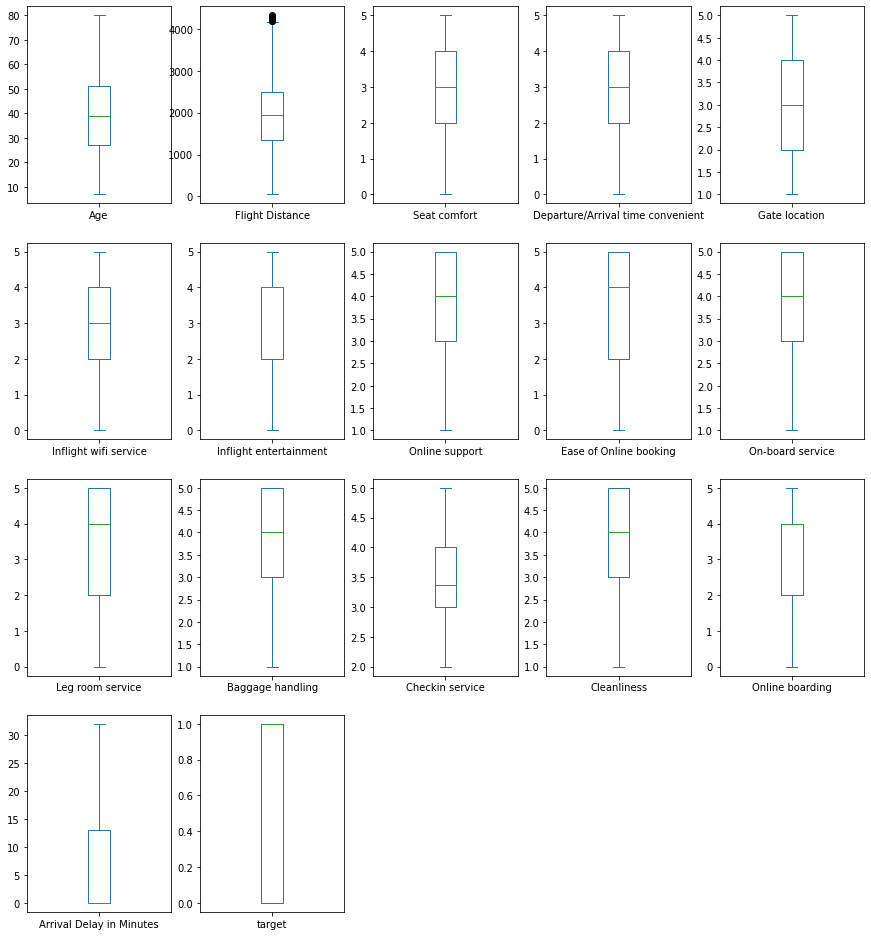

In [9]:
tr_d.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 21))
plt.show()

이상치를 모두 제거한 것을 볼 수 있다. percentile의 경우 최초 30 70으로 두었지만 이상치가 소량 남아 있어 지속적으로 조율하였다. 테스트 셋에도 적용한다.

In [10]:
Arrival_delay_index_test = outlier_iqr(te_d['Arrival Delay in Minutes'])[0]
Flight_distance_index_test = outlier_iqr(te_d['Flight Distance'])[0]
Garage_area_index_test = outlier_iqr(te_d['Checkin service'])[0]

te_d.loc[Arrival_delay_index_test, 'Arrival Delay in Minutes'] = te_d['Arrival Delay in Minutes'].mean()
te_d.loc[Flight_distance_index_test, 'Flight Distance'] = te_d['Flight Distance'].mean()
te_d.loc[Garage_area_index_test, 'Checkin service'] = te_d['Checkin service'].mean()


### 데이터 라벨링 (LabelEncoder 사용)

In [11]:
tr_d[tr_d.columns[tr_d.dtypes==object]] = tr_d[tr_d.columns[tr_d.dtypes==object]].astype(str).apply(LabelEncoder().fit_transform)
te_d[te_d.columns[te_d.dtypes==object]] = te_d[te_d.columns[te_d.dtypes==object]].astype(str).apply(LabelEncoder().fit_transform)

In [12]:
tr_d.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599.0,3,0,3,4,...,4,4,5,4,4,4.00,5,4,0.0,0
1,0,0,37,0,0,2810.0,2,4,4,1,...,3,5,5,4,2,3.37,5,2,18.0,0
2,1,0,46,0,0,2622.0,1,1,1,4,...,5,4,4,4,4,5.00,4,3,0.0,1
3,0,1,24,0,1,2348.0,3,3,3,3,...,3,3,2,4,5,3.00,4,3,2.0,0
4,0,0,58,0,0,105.0,3,3,3,4,...,5,4,4,4,4,4.00,4,5,0.0,1


## 모델 학습

여러 모델을 비교하기 위한 importing

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 평가척도

In [2]:
def accuracy(true, pred):
  score = np.mean(true==pred)
  return score

In [3]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

### K fold

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

def kfold(model, train, scale = False):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['target']):
        
        train_cv = train.iloc[t] # 훈련용
        val_cv = train.iloc[v] # 검증용 분리

        train_X = train_cv.drop('target', axis=1)
        train_y = train_cv['target']

        val_X = val_cv.drop('target', axis=1)
        val_y = val_cv['target']
            
        model.fit(train_X, train_y)
        score = accuracy(val_y, model.predict(val_X))
        
        cv_accuracy.append(score)
        n_iter += 1
    return np.mean(cv_accuracy)

In [5]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20, n_estimators=300),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric = 'logloss', \
                              max_depth = 5, \
                              min_child_weight = 3, \
                               gamma = 3, \
                               colsample_bytree = 0.5, \
                               n_estimators=700),
    LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24),
    CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500),
    ExtraTreesClassifier(max_depth=25, n_estimators=320)
]

print('스케일링 적용 전')
for model in models:
    print(f'{type(model).__name__} score: {kfold(model, tr_d)}')

스케일링 적용 전


NameError: name 'tr_d' is not defined

### 모델 튜닝

In [21]:
params = { 'n_estimators' : [10, 100, 1000],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [22]:
train = tr_d.drop('target', axis=1)
target = tr_d['target']

model_RFC = RandomForestClassifier()
grid_cv_RFC = GridSearchCV(model_RFC, param_grid = params, cv=5, n_jobs = -1)
grid_cv_RFC.fit(train, target) # train과 target은 위에 train_test_split하기 전에 있었음
print('최적 하이퍼 파라미터: ', grid_cv_RFC.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_RFC.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 1000}
최고 예측 정확도: 0.8973


### 모델 앙상블

#### XGBClassifier

In [24]:
model_XGB = XGBClassifier(eval_metric='logloss', silent = True)

param_grid={'booster' :['gbtree'],
                 'verbosity':[0],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['binary:logistic'],
                 'random_state':[2]}

grid_cv_XGB=GridSearchCV(model_XGB, param_grid=param_grid, cv=5 , n_jobs=-1)
grid_cv_XGB.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_XGB.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_XGB.best_score_))

/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and wi

최적 하이퍼 파라미터:  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'verbosity': 0}
최고 예측 정확도: 0.9363


### LGBMClassifier

In [25]:
model_LGBM = LGBMClassifier()

LGBM_param_grid = {
  'learning_rate' : [0.005, 0.01],
  'n_estimators' : [100, 500, 1000],
  'num_leaves' : [12, 16, 20],
  'boosting_type' : ['dart'],
  'objective' : ['binary'],
  'max_bin' : [300, 600],
}

grid_cv_LGBM = GridSearchCV(model_LGBM, param_grid=LGBM_param_grid, cv=3, n_jobs=-1)
grid_cv_LGBM.fit(tr_d, target)
print('최적 하이퍼 파라미터 : ', grid_cv_LGBM.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv_LGBM.best_score_))

최적 하이퍼 파라미터 :  {'boosting_type': 'dart', 'learning_rate': 0.005, 'max_bin': 300, 'n_estimators': 100, 'num_leaves': 12, 'objective': 'binary'}
최고 예측 정확도 : 1.0000


### CatBoostClassifier

**모델 특징**  

정형데이터에서 점수가 잘나온다  
랜덤포레스트는 tree끼리 독립적이고, 서로 상호작용이 없어서 점수가 뒤죽박죽이다.  
하지만 이 캣부스트는 tree끼리 상호작용을 하며 tree들이 많을수록 성능이 좋아진다.  
하지만 이 과정을 거치기 위해서는 train을 얼마나 잘하냐가 중요한데 이를 위해 하이퍼 파라미터 설정을 잘해줘야한다.  

코드 형식은 랜덤포레스트와 같다

In [27]:
model_CAT = CatBoostClassifier(silent = True)

CAT_grid = {'learning_rate':[0.03, 0.1],
        'depth':[4, 6, 10],
        'l2_leaf_reg':[1, 3, 5, 7, 9]
        }

grid_cv_CAT = GridSearchCV(model_CAT, param_grid=CAT_grid, cv=3, n_jobs=-1)
grid_cv_CAT.fit(tr_d, target)
print('최적 하이퍼 파라미터 : ', grid_cv_CAT.best_params_)
print('최고 예측 정화도 : {:.4f}'.format(grid_cv_CAT.best_score_))

최적 하이퍼 파라미터 :  {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
최고 예측 정화도 : 1.0000
